In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import tree

## Getting the Data

Import the data set from project_data.csv

In [2]:
raw_data = pd.read_csv('project_data.csv')

## Cleaning and Preparing the Data

In [3]:
raw_data.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,target
0,A,6.5,0.38,0.34,3.4,0.036,34.0,200.0,0.99370,3.14,0.76,10.0,1
1,B,10.3,0.59,0.42,2.8,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,1
2,B,6.7,0.86,0.07,2.0,0.100,20.0,57.0,0.99598,3.60,0.74,11.7,1
3,A,6.0,0.28,0.52,6.2,0.028,37.0,104.0,0.99161,3.28,0.51,11.8,0
4,A,6.0,0.28,0.52,5.0,0.078,30.0,139.0,0.99494,3.10,0.36,9.0,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Feat0   5497 non-null   object 
 1   Feat1   5497 non-null   float64
 2   Feat2   5497 non-null   float64
 3   Feat3   5497 non-null   float64
 4   Feat4   5497 non-null   float64
 5   Feat5   5497 non-null   float64
 6   Feat6   5497 non-null   float64
 7   Feat7   5497 non-null   float64
 8   Feat8   5497 non-null   float64
 9   Feat9   5497 non-null   float64
 10  Feat10  5497 non-null   float64
 11  Feat11  5497 non-null   float64
 12  target  5497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [5]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Feat1,5497.0,7.216527,1.294779,3.80000,6.40000,7.00000,7.700,15.90000
Feat2,5497.0,0.341117,0.164608,0.08000,0.23000,0.29000,0.410,1.58000
Feat3,5497.0,0.319081,0.145481,0.00000,0.25000,0.31000,0.400,1.66000
Feat4,5497.0,5.430298,4.791331,0.60000,1.80000,3.00000,8.100,65.80000
Feat5,5497.0,0.056582,0.035954,0.01200,0.03800,0.04800,0.066,0.61100
Feat6,5497.0,30.433782,17.490390,1.00000,17.00000,29.00000,41.000,146.50000
Feat7,5497.0,115.909496,56.708725,6.00000,77.00000,118.00000,156.000,366.50000
Feat8,5497.0,0.994723,0.003009,0.98711,0.99238,0.99494,0.997,1.03898
Feat9,5497.0,3.217124,0.159991,2.72000,3.11000,3.20000,3.320,4.01000
Feat10,5497.0,0.529722,0.147527,0.23000,0.43000,0.51000,0.600,2.00000


In [6]:
raw_data['Feat0'].unique()

array(['A', 'B'], dtype=object)

Potentially most important take away from this quick review is that Feat0 is made up of characters A and B. We need to tansform this feature to be a numerical.

The transformation will be A = 1, B = 0. 

In [7]:
raw_data['Feat0'].replace('A',1, inplace=True)
raw_data['Feat0'].replace('B',0, inplace=True)
data = raw_data

In [8]:
data 

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,target
0,1,6.5,0.38,0.34,3.40,0.036,34.0,200.0,0.99370,3.14,0.76,10.0,1
1,0,10.3,0.59,0.42,2.80,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,1
2,0,6.7,0.86,0.07,2.00,0.100,20.0,57.0,0.99598,3.60,0.74,11.7,1
3,1,6.0,0.28,0.52,6.20,0.028,37.0,104.0,0.99161,3.28,0.51,11.8,0
4,1,6.0,0.28,0.52,5.00,0.078,30.0,139.0,0.99494,3.10,0.36,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,1,6.1,0.21,0.19,1.40,0.046,51.0,131.0,0.99184,3.22,0.39,10.5,1
5493,1,5.6,0.42,0.34,2.40,0.022,34.0,97.0,0.98915,3.22,0.38,12.8,0
5494,1,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,1
5495,1,6.7,0.30,0.29,2.80,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,0


## Exploratory Data Analysis

Use seaborn to explore the data.  

In [9]:
sns.set_style('whitegrid')

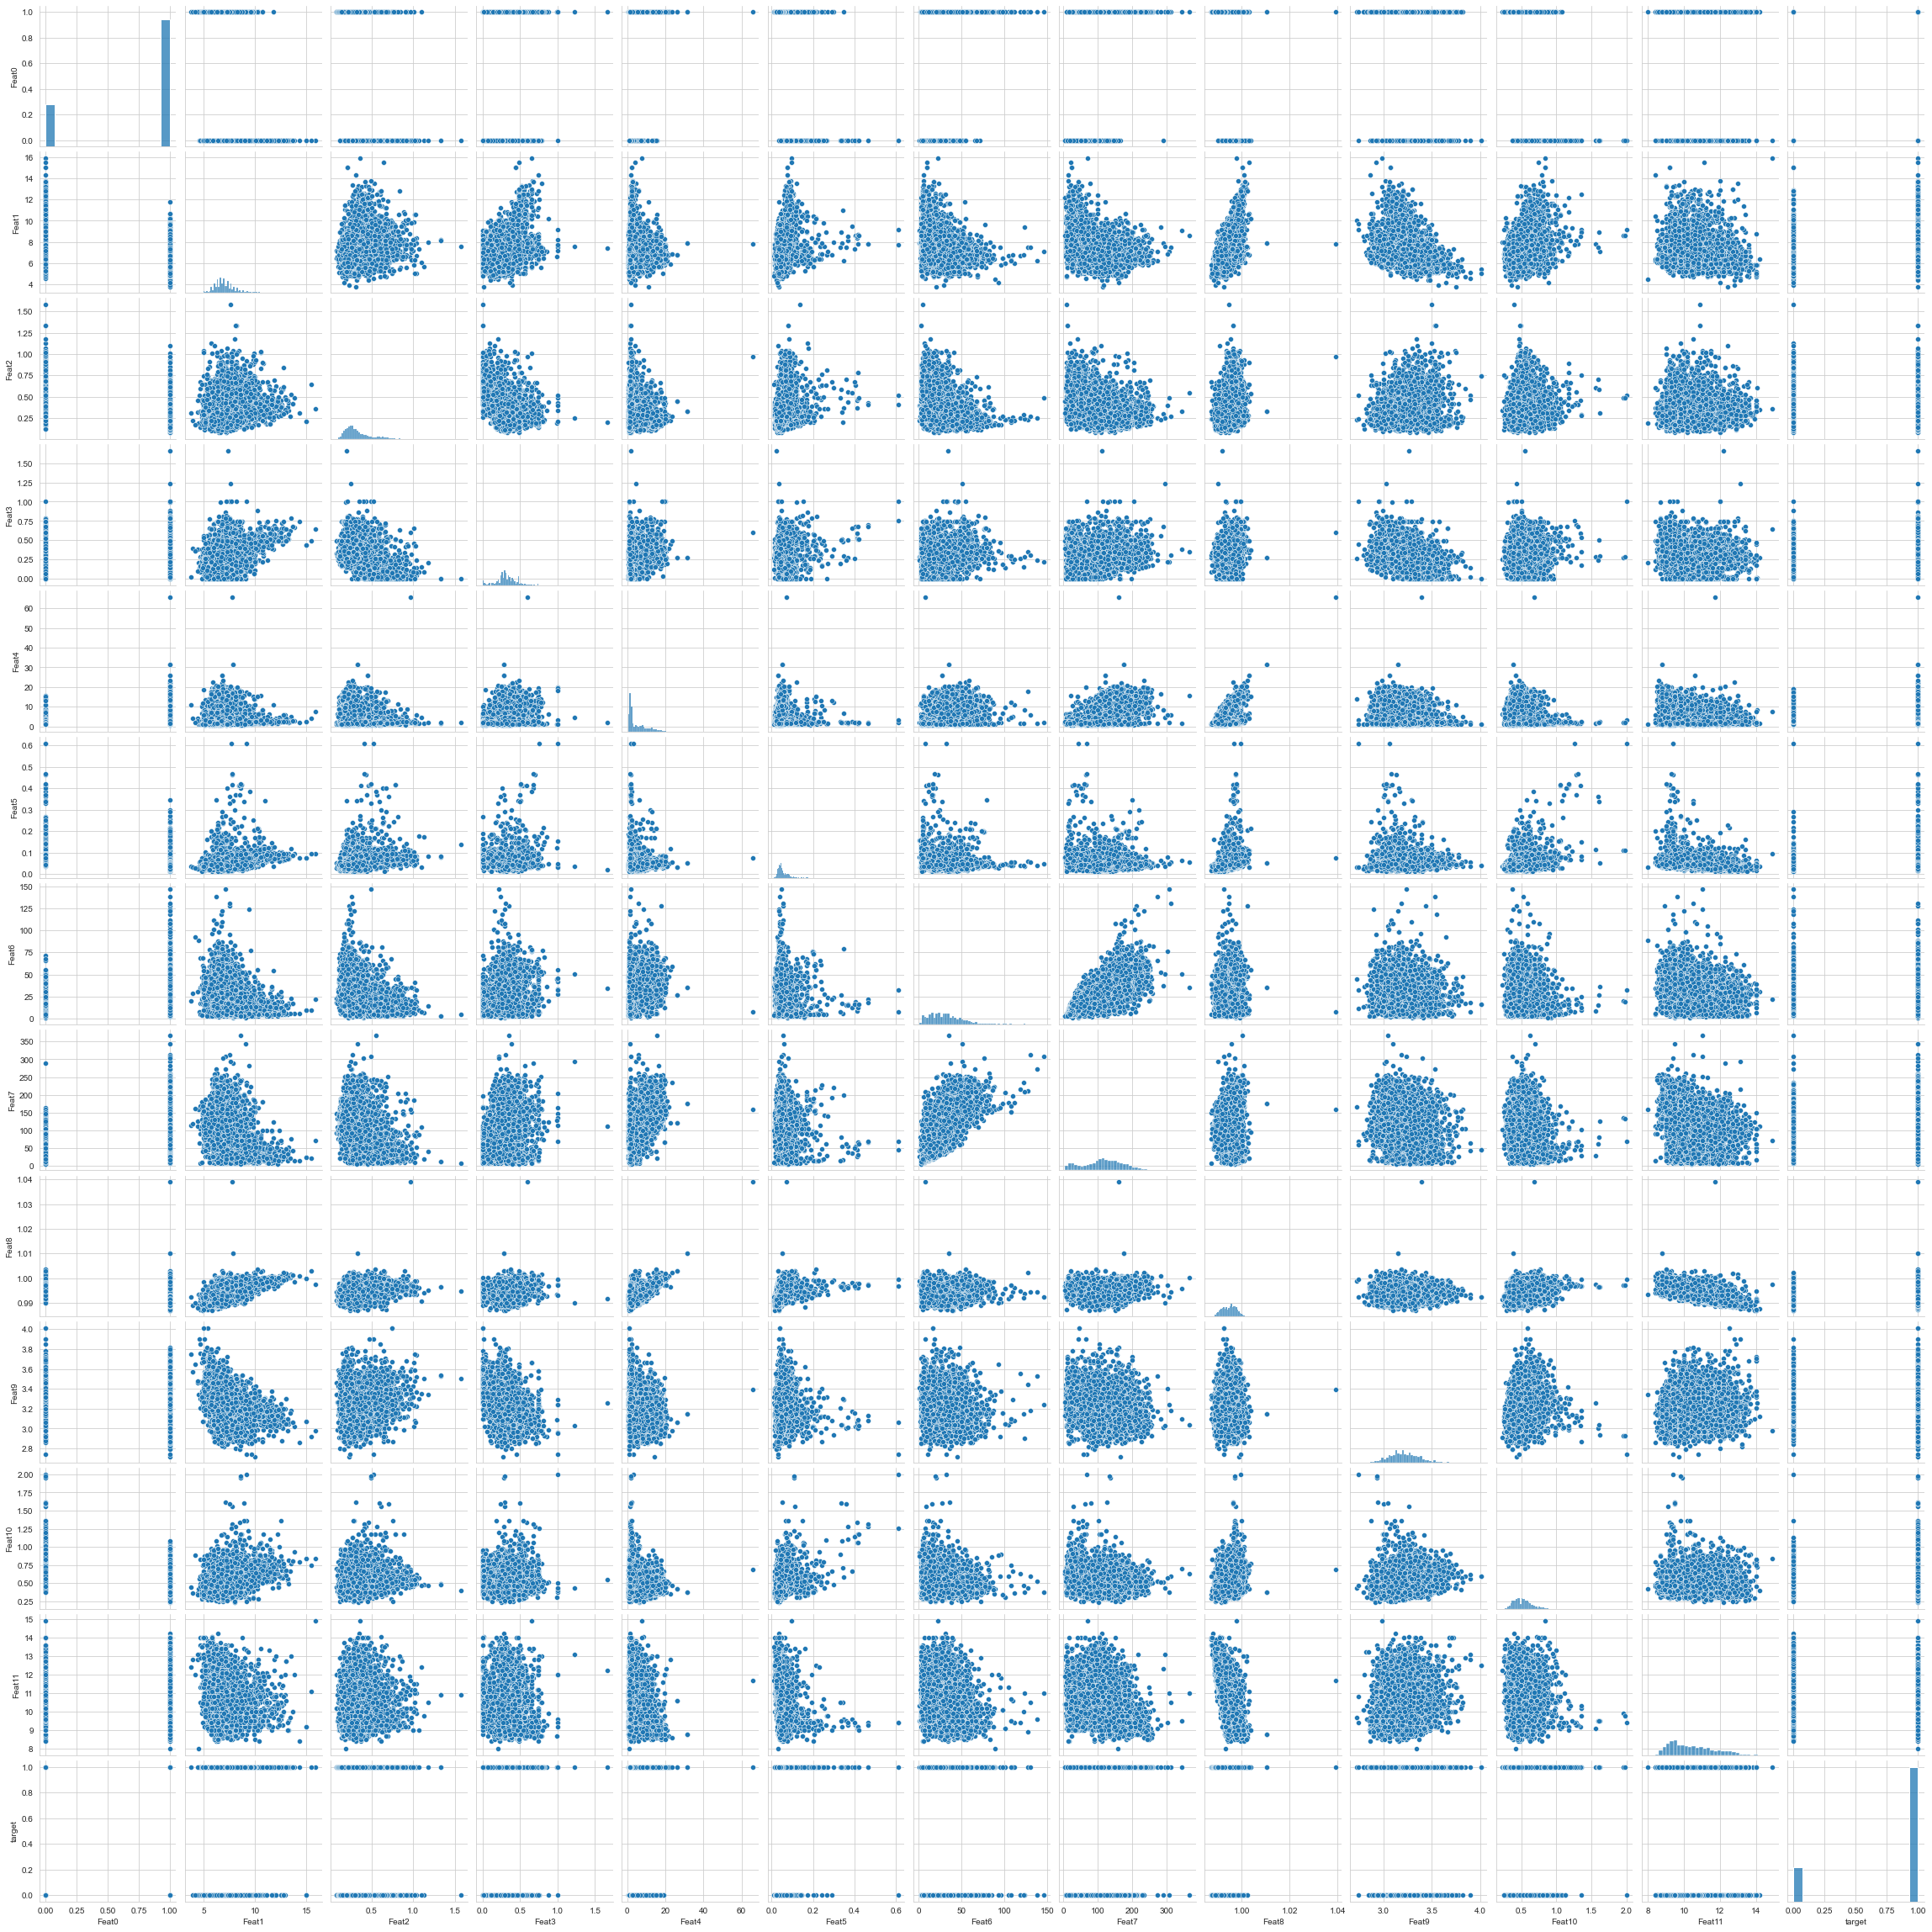

In [10]:
sns.pairplot(data);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

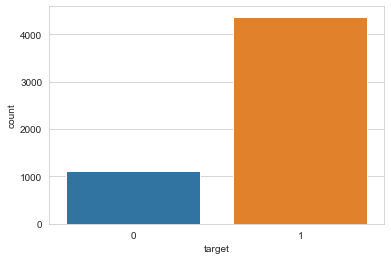

In [11]:
sns.countplot(data['target'])

## Data Scaling
Now we are going to scale the data. 

In [12]:
#Scaler Data for all Features
scaler_a = StandardScaler()
scaler_a.fit(data.drop(['target'], axis=1))
scaled_features_a = scaler_a.transform(data.drop(['target'],axis=1))
scaled_data = pd.DataFrame(scaled_features_a,columns=data.columns[:-1])
scaled_data.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11
0,0.574760,-0.553448,0.236237,0.143803,-0.423783,-0.572508,0.203914,1.482984,-0.339915,-0.482094,1.561064,-0.397856
1,-1.739858,2.381683,1.512111,0.693752,-0.549020,0.929557,0.261094,-0.756734,1.421620,0.393033,1.154322,-0.819031
2,-1.739858,-0.398967,3.152520,-1.712277,-0.716004,1.207718,-0.596598,-1.038903,0.417877,2.393322,1.425484,1.034141
3,0.574760,-0.939649,-0.371322,1.381189,0.160659,-0.795036,0.375453,-0.210031,-1.034558,0.393033,-0.133694,1.118376
4,0.574760,-0.939649,-0.371322,1.381189,-0.089816,0.595765,-0.024803,0.407214,0.072218,-0.732130,-1.150549,-1.240207


In [13]:
#Scaler Data for all Features except Feat0 (Scaled Adjusted Data)
scaler_b = StandardScaler()
scaler_b.fit(data.drop(['target', 'Feat0'], axis=1))
scaled_features_b = scaler_b.transform(data.drop(['target', 'Feat0'],axis=1))
scaled_adjusted_data = pd.DataFrame(scaled_features_b,columns=data.columns[1:-1])
scaled_adjusted_data['Feat0'] = data['Feat0']
scaled_adjusted_data = scaled_adjusted_data[['Feat0','Feat1','Feat2','Feat3','Feat4','Feat5','Feat6','Feat7','Feat8','Feat9','Feat10','Feat11']]
scaled_adjusted_data.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11
0,1,-0.553448,0.236237,0.143803,-0.423783,-0.572508,0.203914,1.482984,-0.339915,-0.482094,1.561064,-0.397856
1,0,2.381683,1.512111,0.693752,-0.549020,0.929557,0.261094,-0.756734,1.421620,0.393033,1.154322,-0.819031
2,0,-0.398967,3.152520,-1.712277,-0.716004,1.207718,-0.596598,-1.038903,0.417877,2.393322,1.425484,1.034141
3,1,-0.939649,-0.371322,1.381189,0.160659,-0.795036,0.375453,-0.210031,-1.034558,0.393033,-0.133694,1.118376
4,1,-0.939649,-0.371322,1.381189,-0.089816,0.595765,-0.024803,0.407214,0.072218,-0.732130,-1.150549,-1.240207


## Divide Data into Train and Test (Scaled and Unscaled)

In [14]:
np.random.seed(11235813) #Set seed to replicate results

#UnScaled
X = data.drop('target',axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#Scaled
X_s = scaled_data
y_s = data['target']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=101)

#Scaled Adjusted
X_sa = scaled_adjusted_data
y_sa = data['target']
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(X_sa, y_sa, test_size=0.30, random_state=101)

## Logistic Regression (UnScaled)

In [15]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
log_pred = logmodel.predict(X_test)

In [16]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.63      0.13      0.21       343
           1       0.81      0.98      0.89      1307

    accuracy                           0.80      1650
   macro avg       0.72      0.55      0.55      1650
weighted avg       0.77      0.80      0.75      1650



## Logistic Regression (Scaled)

In [17]:
logmodel_s = LogisticRegression(solver='liblinear')
logmodel_s.fit(X_train_s,y_train_s)
log_pred_s = logmodel_s.predict(X_test_s)

In [18]:
print(classification_report(y_test_s,log_pred_s))

              precision    recall  f1-score   support

           0       0.66      0.17      0.27       343
           1       0.82      0.98      0.89      1307

    accuracy                           0.81      1650
   macro avg       0.74      0.57      0.58      1650
weighted avg       0.78      0.81      0.76      1650



## Logistic Regression (Scaled Adjusted)

In [19]:
logmodel_sa = LogisticRegression(solver='liblinear')
logmodel_sa.fit(X_train_sa,y_train_sa)
log_pred_sa = logmodel_sa.predict(X_test_sa)

In [20]:
print(classification_report(y_test_sa,log_pred_sa))

              precision    recall  f1-score   support

           0       0.64      0.17      0.27       343
           1       0.82      0.97      0.89      1307

    accuracy                           0.81      1650
   macro avg       0.73      0.57      0.58      1650
weighted avg       0.78      0.81      0.76      1650



## K-Nearest Neighbors (UnScaled)

In [21]:
knnmodel = KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(X_train,y_train)

knn_pred = knnmodel.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       343
           1       0.86      0.86      0.86      1307

    accuracy                           0.78      1650
   macro avg       0.66      0.66      0.66      1650
weighted avg       0.78      0.78      0.78      1650



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X do

Text(0, 0.5, 'Error Rate')

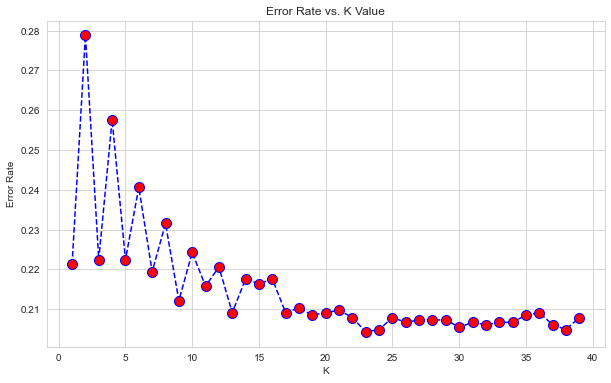

In [23]:
#Choosing a K Value
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knnmodel = KNeighborsClassifier(n_neighbors=23)
knnmodel.fit(X_train,y_train)

knn_pred = knnmodel.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.62      0.04      0.08       343
           1       0.80      0.99      0.89      1307

    accuracy                           0.80      1650
   macro avg       0.71      0.52      0.48      1650
weighted avg       0.76      0.80      0.72      1650



## K-Nearest Neighbors (Scaled)

In [26]:
knnmodel_s = KNeighborsClassifier(n_neighbors=1)
knnmodel_s.fit(X_train_s,y_train_s)

knn_pred_s = knnmodel.predict(X_test_s)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
print(classification_report(y_test,knn_pred_s))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.79      1.00      0.88      1307

    accuracy                           0.79      1650
   macro avg       0.40      0.50      0.44      1650
weighted avg       0.63      0.79      0.70      1650



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X do

Text(0, 0.5, 'Error Rate')

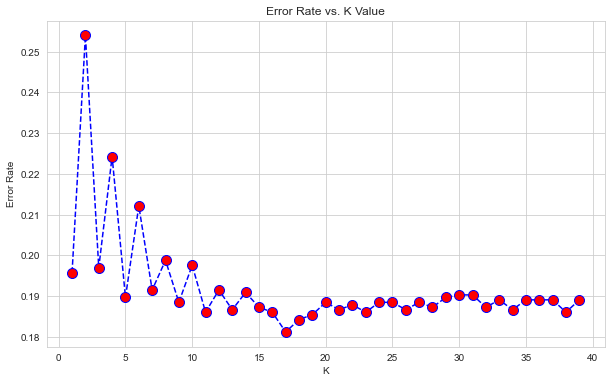

In [28]:
#Choosing a K Value (Scaled)
error_rate_s = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s,y_train_s)
    pred_i = knn.predict(X_test_s)
    error_rate_s.append(np.mean(pred_i != y_test_s))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_s,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knnmodel_s = KNeighborsClassifier(n_neighbors=17)
knnmodel_s.fit(X_train_s,y_train_s)

knn_pred_s = knnmodel.predict(X_test_s)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
print(classification_report(y_test,knn_pred_s))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.79      1.00      0.88      1307

    accuracy                           0.79      1650
   macro avg       0.40      0.50      0.44      1650
weighted avg       0.63      0.79      0.70      1650



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## K-Nearest Neighbors (Scaled Adjusted)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X do

Text(0, 0.5, 'Error Rate')

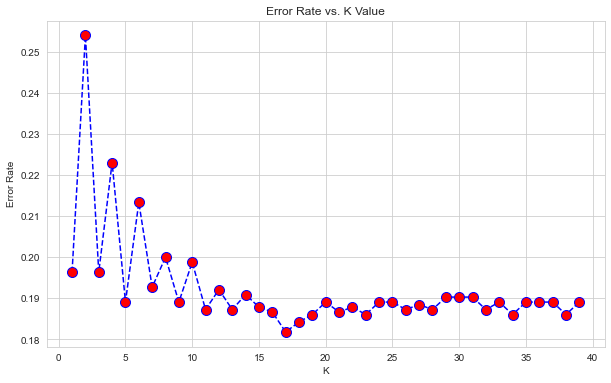

In [31]:
#Choosing a K Value (Scaled Adjusted)
error_rate_sa = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sa,y_train_sa)
    pred_i = knn.predict(X_test_sa)
    error_rate_sa.append(np.mean(pred_i != y_test_sa))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_sa,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knnmodel_sa = KNeighborsClassifier(n_neighbors=17)
knnmodel_sa.fit(X_train_sa,y_train_sa)

knn_pred_sa = knnmodel.predict(X_test_sa)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
print(classification_report(y_test,knn_pred_sa))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.79      1.00      0.88      1307

    accuracy                           0.79      1650
   macro avg       0.40      0.50      0.44      1650
weighted avg       0.63      0.79      0.70      1650



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Decision Trees (UnScaled)

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

In [35]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       343
           1       0.88      0.87      0.87      1307

    accuracy                           0.80      1650
   macro avg       0.69      0.70      0.70      1650
weighted avg       0.80      0.80      0.80      1650



## Decision Tree (Scaled)

In [36]:
dt_s = DecisionTreeClassifier()
dt_s.fit(X_train_s,y_train_s)

dt_pred_s = dt.predict(X_test_s)

In [37]:
print(classification_report(y_test,dt_pred_s))

              precision    recall  f1-score   support

           0       0.12      0.09      0.10       343
           1       0.77      0.82      0.80      1307

    accuracy                           0.67      1650
   macro avg       0.45      0.46      0.45      1650
weighted avg       0.64      0.67      0.65      1650



## Decision Tree (Scaled Adjusted)

In [38]:
dt_sa = DecisionTreeClassifier()
dt_sa.fit(X_train_sa,y_train_sa)

dt_pred_sa = dt.predict(X_test_sa)

In [39]:
print(classification_report(y_test,dt_pred_sa))

              precision    recall  f1-score   support

           0       0.12      0.09      0.10       343
           1       0.77      0.82      0.80      1307

    accuracy                           0.67      1650
   macro avg       0.45      0.46      0.45      1650
weighted avg       0.64      0.67      0.65      1650



## Support Vector Machines (UnScaled)

In [40]:
svm = SVC()
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)

In [41]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.79      1.00      0.88      1307

    accuracy                           0.79      1650
   macro avg       0.40      0.50      0.44      1650
weighted avg       0.63      0.79      0.70      1650



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Support Vector Machines (Scaled)

In [42]:
svm_s = SVC()
svm_s.fit(X_train_s,y_train_s)

svm_pred_s = svm_s.predict(X_test_s)

In [43]:
print(classification_report(y_test_s,svm_pred_s))

              precision    recall  f1-score   support

           0       0.62      0.16      0.26       343
           1       0.82      0.97      0.89      1307

    accuracy                           0.81      1650
   macro avg       0.72      0.57      0.57      1650
weighted avg       0.78      0.81      0.76      1650



## Support Vector Machines (Scaled Adjusted)

In [44]:
svm_sa = SVC()
svm_sa.fit(X_train_sa,y_train_sa)

svm_pred_sa = svm_sa.predict(X_test_sa)

In [45]:
print(classification_report(y_test_sa,svm_pred_sa))

              precision    recall  f1-score   support

           0       0.61      0.15      0.25       343
           1       0.81      0.97      0.89      1307

    accuracy                           0.80      1650
   macro avg       0.71      0.56      0.57      1650
weighted avg       0.77      0.80      0.75      1650



## Model for New Observations - Logistic Regression (Scaled Data Set)

In [46]:
new_obs = pd.read_csv('new_obs.csv')
new_data = new_obs
new_data['Feat0'].replace('A',1, inplace=True)
new_data['Feat0'].replace('B',0, inplace=True)
new_data.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11
0,1,6.6,0.26,0.28,9.4,0.028,13.0,121.0,0.99254,3.17,0.34,12.1
1,0,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7
2,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
3,0,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5
4,1,6.4,0.28,0.44,7.1,0.048,49.0,179.0,0.99528,3.15,0.48,9.2


In [47]:
#Scale New Observations
scaler_new = StandardScaler()
scaler_new.fit(new_data)
scaled_features_new = scaler_new.transform(new_data)
scaled_data_new = pd.DataFrame(scaled_features_new,columns=new_data.columns)
scaled_data_new.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11
0,0.552705,-0.466192,-0.435636,-0.250498,0.850532,-0.854389,-0.943776,0.111077,-0.685466,-0.340050,-1.285753,1.233765
1,-1.809283,0.759420,0.536630,1.203870,-0.637924,1.057836,0.050857,-1.078651,1.445912,0.690956,1.353076,-1.560739
2,-1.809283,0.146614,2.238094,-2.189655,-0.791147,0.784661,-1.048474,-1.457202,1.105436,1.721963,0.130204,-0.985400
3,-1.809283,2.291436,0.961996,2.173449,-0.572256,0.648073,-1.100823,-1.601411,0.764961,-0.400698,1.546161,1.562531
4,0.552705,-0.619394,-0.314103,0.857592,0.347084,-0.171451,0.940792,1.156597,0.247437,-0.461345,-0.384690,-1.149782


In [48]:
#Final Train Scaled Data
X_train_final = scaled_data
y_train_final = data['target']

#Final Test Data
X_test_final = scaled_data_new

In [49]:
X_test_final

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11
0,0.552705,-0.466192,-0.435636,-0.250498,0.850532,-0.854389,-0.943776,0.111077,-0.685466,-0.340050,-1.285753,1.233765
1,-1.809283,0.759420,0.536630,1.203870,-0.637924,1.057836,0.050857,-1.078651,1.445912,0.690956,1.353076,-1.560739
2,-1.809283,0.146614,2.238094,-2.189655,-0.791147,0.784661,-1.048474,-1.457202,1.105436,1.721963,0.130204,-0.985400
3,-1.809283,2.291436,0.961996,2.173449,-0.572256,0.648073,-1.100823,-1.601411,0.764961,-0.400698,1.546161,1.562531
4,0.552705,-0.619394,-0.314103,0.857592,0.347084,-0.171451,0.940792,1.156597,0.247437,-0.461345,-0.384690,-1.149782
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.552705,-0.849196,-0.314103,-0.319753,0.544085,-0.171451,0.521999,0.850151,0.145295,-0.097460,-0.191605,-0.574443
996,0.552705,0.223215,-0.131803,-0.527520,0.347084,-0.751948,-0.158539,0.471601,-0.198586,-0.400698,-1.028306,0.000896
997,0.552705,0.146614,-0.800235,0.303547,-0.944370,-0.512920,0.679046,-0.069185,-0.665038,0.812251,-1.285753,-0.574443
998,-1.809283,3.287246,0.111264,1.203870,-0.484700,0.579780,-1.100823,-1.403123,1.956626,0.569661,2.382862,0.329661


In [50]:
logmodel_final = LogisticRegression(solver='liblinear')
logmodel_final.fit(X_train_final,y_train_final)

log_pred_final = logmodel_final.predict(X_test_final)

In [51]:
data_final = pd.read_csv('new_obs.csv')
data_final['target'] = log_pred_final
data_final 

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,target
0,A,6.6,0.26,0.28,9.4,0.028,13.0,121.0,0.99254,3.17,0.34,12.1,1
1,B,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,1
2,B,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
3,B,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5,1
4,A,6.4,0.28,0.44,7.1,0.048,49.0,179.0,0.99528,3.15,0.48,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A,6.1,0.28,0.27,8.0,0.048,41.0,162.0,0.99498,3.21,0.51,9.9,1
996,A,7.5,0.31,0.24,7.1,0.031,28.0,141.0,0.99397,3.16,0.38,10.6,1
997,A,7.4,0.20,0.36,1.2,0.038,44.0,111.0,0.99260,3.36,0.34,9.9,1
998,B,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.00030,3.32,0.91,11.0,1


In [52]:
data_final.to_csv('predictions.csv',index=False)